In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [159]:
df=pd.read_csv(r"C:\Users\thefl\Documents\Code\SM-Mentoring\SM-Demand Forecasting\Data\raw\complete_dataset.csv")

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [161]:
df.head(3)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.54,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N


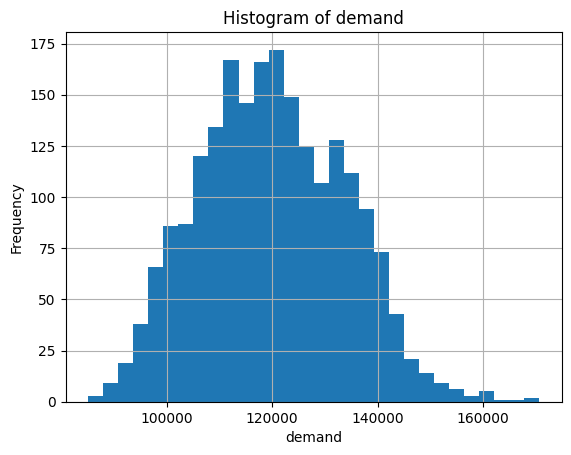

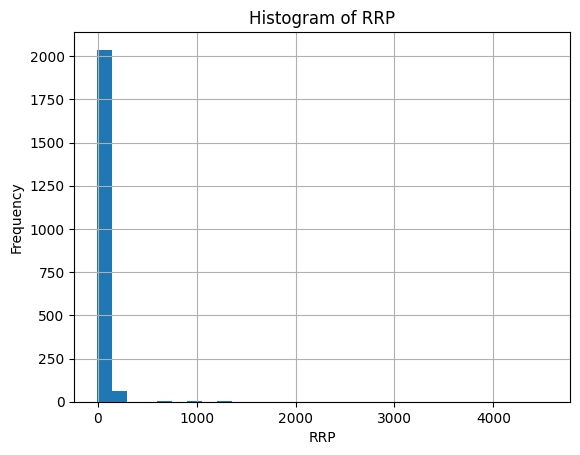

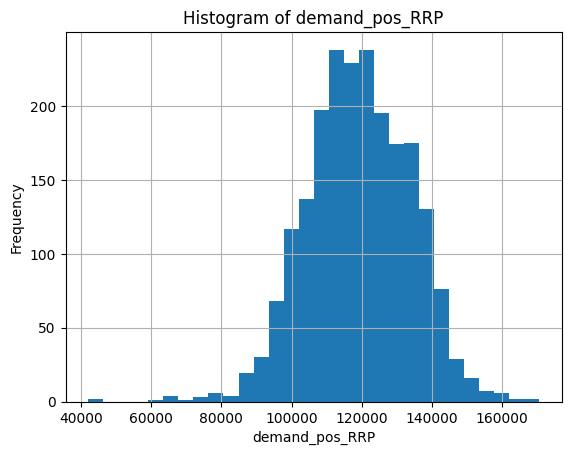

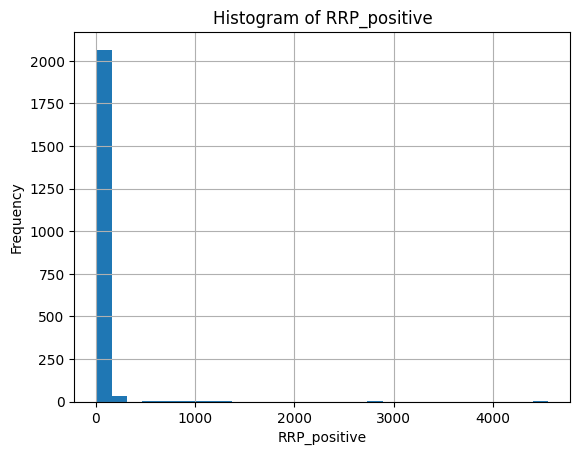

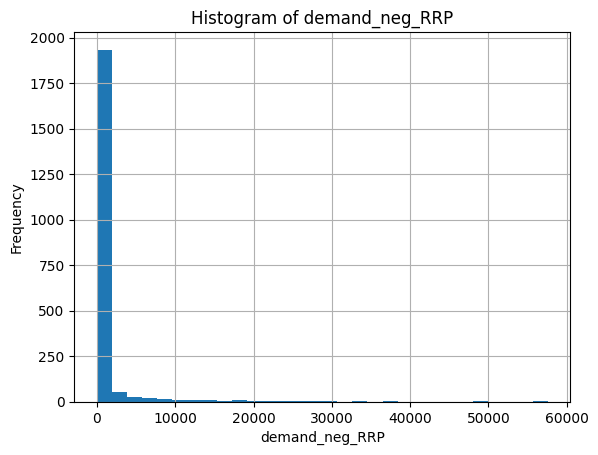

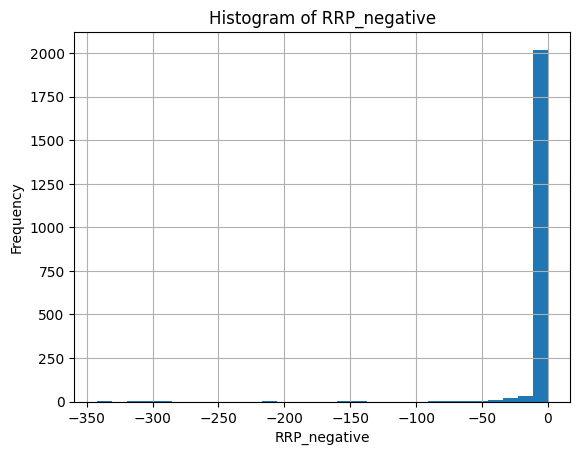

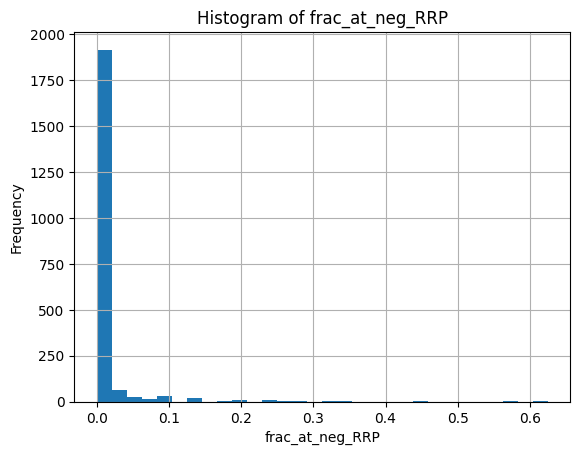

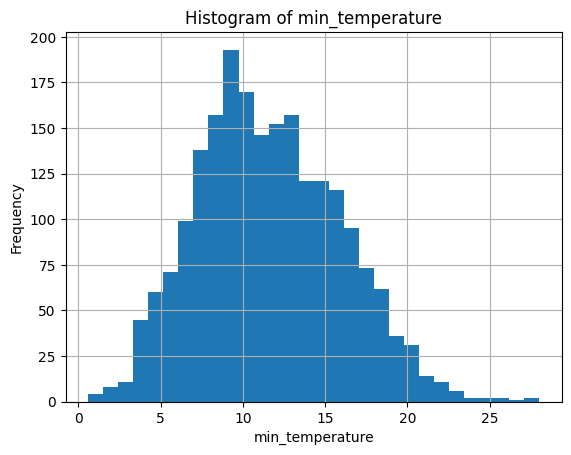

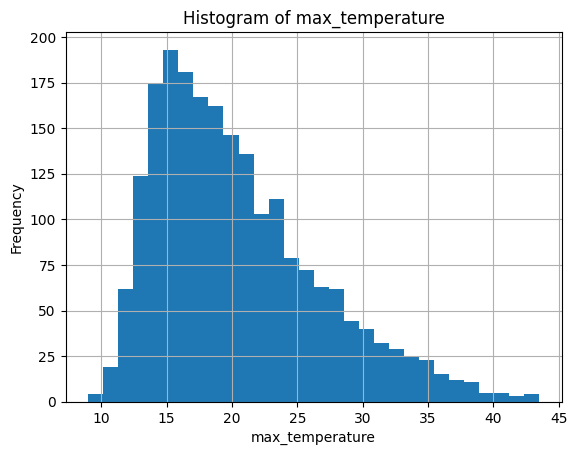

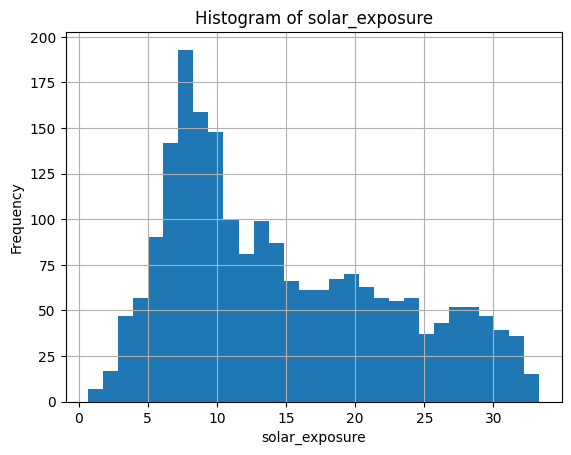

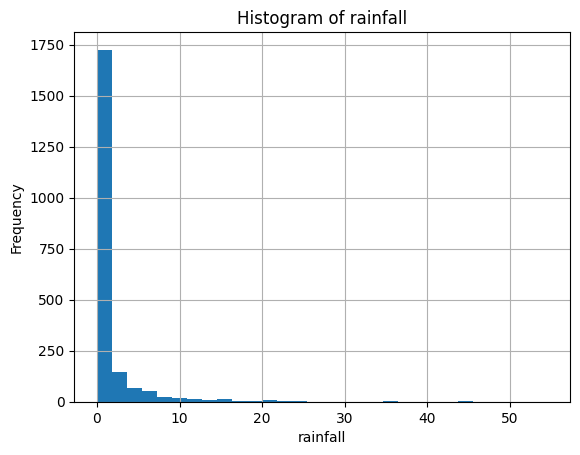

In [162]:
numeric_col=df.select_dtypes(exclude=['object']).columns
for col in numeric_col:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [136]:
for col in numeric_col:
    fig = px.box(df, y=col, title=f'Box Plot of {col}')
    fig.show()

In [137]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [138]:
ohe_enc=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')

In [139]:
df_encoded=ohe_enc.fit_transform(df[['school_day','holiday']])
df=pd.concat([df,df_encoded],axis=1).drop(columns=['school_day','holiday'])

In [140]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['weekofyear'] = df['date'].dt.isocalendar().week  # ISO week number
df['quarter'] = df['date'].dt.quarter
df['dayofyear'] = df['date'].dt.dayofyear

In [163]:
df.sort_values('date',inplace=True)

In [ ]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

In [164]:
split_index

1684

In [166]:
# df.iloc[split_index]

In [145]:
# Split the dataset
train_df = df.iloc[:split_index].reset_index(drop=True)
test_df = df.iloc[split_index:].reset_index(drop=True)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (1684, 21)
Testing set shape: (422, 21)


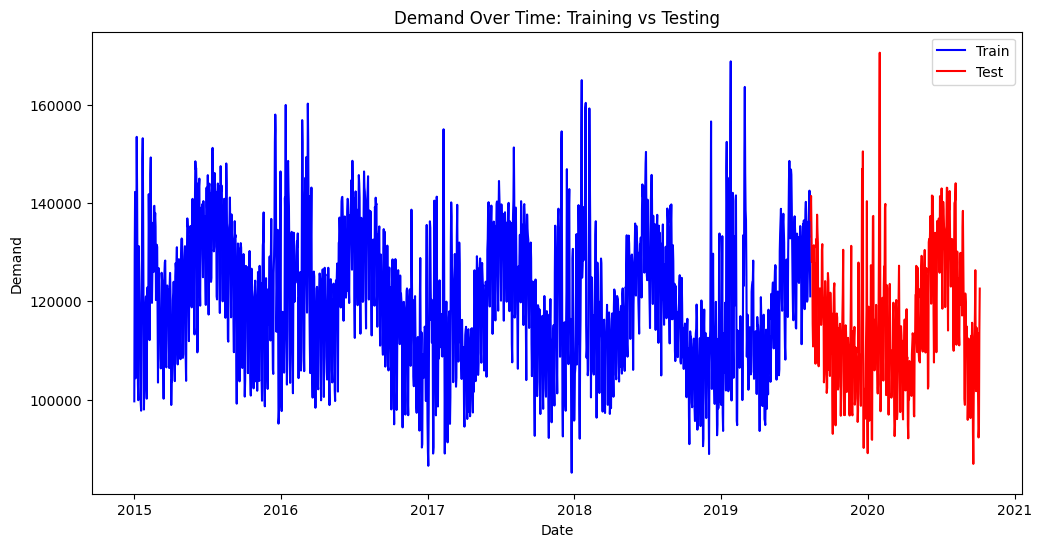

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], train_df['demand'], label='Train', color='blue')
plt.plot(test_df['date'], test_df['demand'], label='Test', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand Over Time: Training vs Testing')
plt.legend()
plt.show()


In [149]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Prepare the training features and target variable
X_train = train_df.drop(columns=['date', 'demand'])
y_train = train_df['demand']

# Instantiate the XGBoost regressor
model = XGBRegressor(objective='reg:squarederror', max_depth=5, n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# (Optional) Evaluate the model on the testing data
X_test = test_df.drop(columns=['date', 'demand'])
y_test = test_df['demand']
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


Test MSE: 3115375.817929557


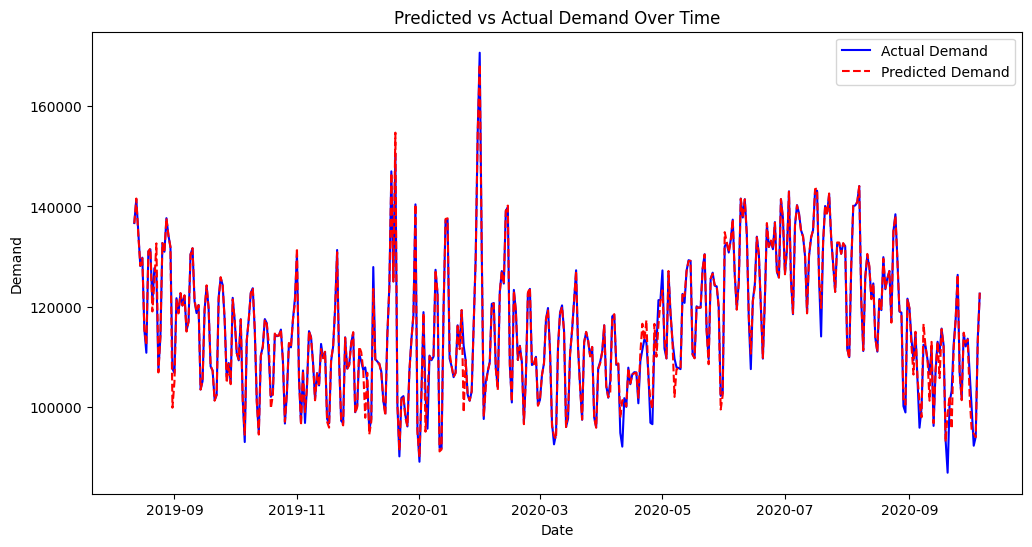

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_df['date'], y_test, label='Actual Demand', color='blue')
plt.plot(test_df['date'], y_pred, label='Predicted Demand', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs Actual Demand Over Time')
plt.legend()

plt.show()


In [169]:
X_train

,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day_Y,holiday_Y,year,month,day,dayofweek,weekofyear,quarter,dayofyear
0,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,0.0,1.0,2015,1,1,3,1,1,1
1,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,0.0,0.0,2015,1,2,4,1,1,2
2,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,0.0,0.0,2015,1,3,5,1,1,3
3,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,0.0,0.0,2015,1,4,6,1,1,4
4,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,0.0,0.0,2015,1,5,0,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,129.262529,136315.380,129.262529,0.000,0.000000,0.000000,9.3,14.1,7.5,0.0,1.0,0.0,2019,8,7,2,32,3,219
1680,95.454195,133004.730,95.454195,0.000,0.000000,0.000000,6.7,13.9,9.6,10.8,1.0,0.0,2019,8,8,3,32,3,220
1681,119.957481,142555.105,119.957481,0.000,0.000000,0.000000,7.8,10.1,7.3,2.0,1.0,0.0,2019,8,9,4,32,3,221
1682,94.668809,128554.605,94.668809,0.000,0.000000,0.000000,5.2,12.5,6.6,4.2,1.0,0.0,2019,8,10,5,32,3,222


In [155]:
df.columns

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day_Y',
       'holiday_Y', 'year', 'month', 'day', 'dayofweek', 'weekofyear',
       'quarter', 'dayofyear'],
      dtype='object')